In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

x = np.array([0, 36, 62, 96])
y = np.array([0, 3e5, 3.2e6, 1e5])

x *= 15
y /= 3.2e6
print(x)
print(y)

[   0  540  930 1440]
[0.      0.09375 1.      0.03125]


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# from vis import *
from tickets import *
from minutes import *
from models import *

Pickle for breakup_prob_hist is up to date.
Pickle for expected_tickets is up to date.


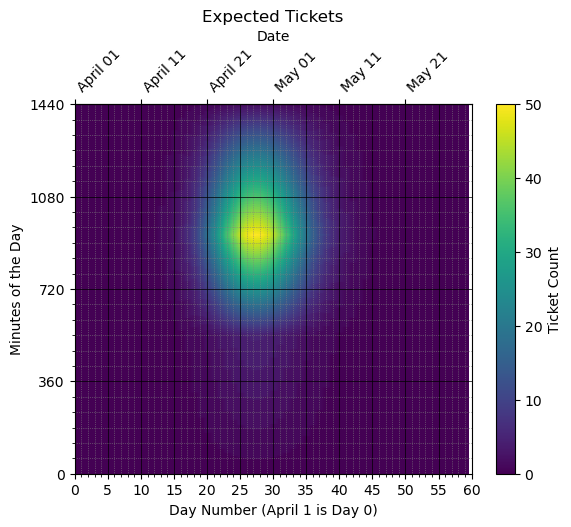

In [43]:
m = Models(model_id=2)
m.plot(1)

In [34]:
max(scaled_minutes)

0.9994916160373145

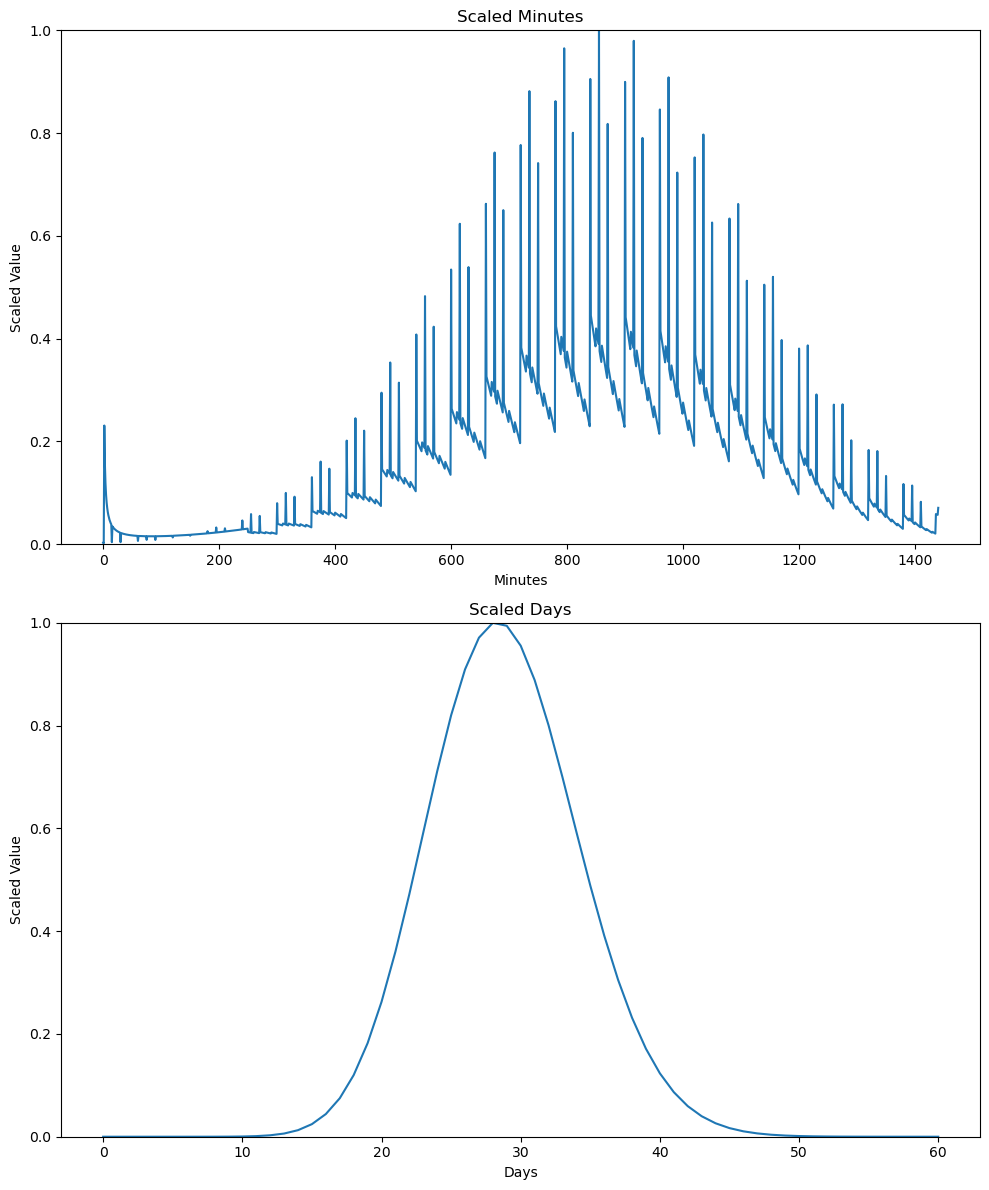

In [35]:
expected_tickets, scale_day, scale_minute = m.ticket_model_2(m.ticket_model_dict)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Scaled minutes subplot
minutes = np.arange(0, 1441)
scaled_minutes = [scale_minute(minute) for minute in minutes]
axs[0].plot(minutes, scaled_minutes)
axs[0].set_title('Scaled Minutes')
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Scaled Value')

# Scaled days subplot
days = range(61)
scaled_days = [scale_day(day) for day in days]
axs[1].plot(days, scaled_days)
axs[1].set_title('Scaled Days')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Scaled Value')


# Set y-limits for all subplots
for ax in axs:
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [36]:
print(expected_tickets(33, 863))
print(m.get_expected_tickets(33, 863))

13
13


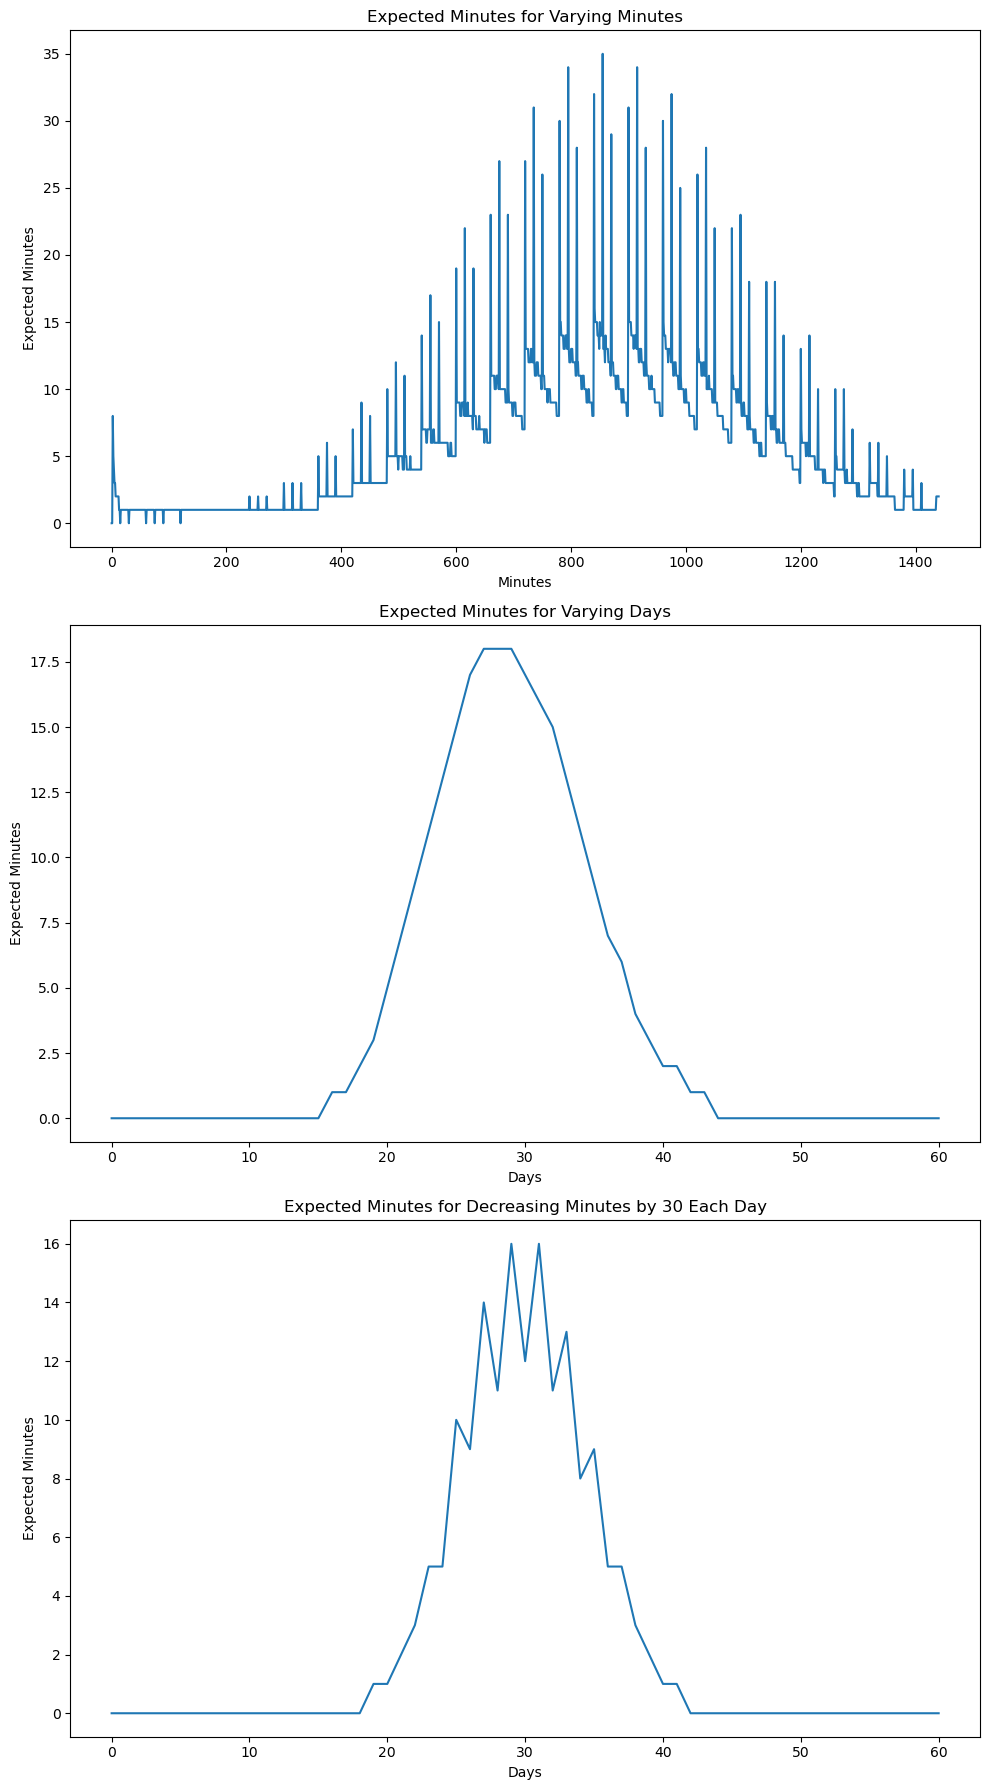

In [37]:
reference_day = 33
reference_min = 863

fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Expected minutes subplot for varying minutes
expected_tickets_for_minutes = [expected_tickets(reference_day, minute) for minute in minutes]
axs[0].plot(minutes, expected_tickets_for_minutes)
axs[0].set_title('Expected Minutes for Varying Minutes')
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Expected Minutes')

# Expected minutes subplot for varying days
expected_tickets_for_days = [expected_tickets(day, reference_min) for day in days]
axs[1].plot(days, expected_tickets_for_days)
axs[1].set_title('Expected Minutes for Varying Days')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Expected Minutes')

# Expected minutes subplot for decreasing minutes by 30 each day
decreasing_minutes = [reference_min - 30 * (day - reference_day) for day in days]
expected_tickets_for_decreasing_minutes = [expected_tickets(day, minute) for day, minute in zip(days, decreasing_minutes)]
axs[2].plot(days, expected_tickets_for_decreasing_minutes)
axs[2].set_title('Expected Minutes for Decreasing Minutes by 30 Each Day')
axs[2].set_xlabel('Days')
axs[2].set_ylabel('Expected Minutes')

plt.tight_layout()
plt.show()